In [ ]:
! pip install pycryptodome pycryptodomex
! pip uninstall --yes pandas-datareader
! pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: pandas-datareader 0+untagged.811.gea66d6b
Uninstalling pandas-datareader-0+untagged.811.gea66d6b:
  Successfully uninstalled pandas-datareader-0+untagged.811.gea66d6b
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/raphi6/pandas-datareader.git (to revision ea66d6b981554f9d0262038aef2106dda7138316) to /tmp/pip-req-build-y56_k5ep
  Running command git clone --filter=blob:none --quiet https://github.com/raphi6/pandas-datareader.git /tmp/pip-req-build-y56_k5ep
  Running command git rev-parse -q --verify 'sha^ea66d6b981554f9d0262038aef2106dda7138316'
  Running command git fetch -q https://github.com/raphi6/pandas-datareader.git ea66d6b981554f9d0262038aef2106dda7138316
  Running command git checkout -q ea66d6b981554f9d0262038aef2106dda7138316
  Resolved https://github.com/raphi6/pandas-d

In [1]:
# Remove Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# General
import numpy as np

# Data Management
import pandas as pd
from sklearn.model_selection import train_test_split

# Machine Learning
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Evaluation
from sklearn.metrics import precision_score

# Reporting
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BTC-USD.csv")
df.set_index("Date", inplace=True)
df.head(3)

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,0.000878,0.053054,0.001615,970.403015,1.103895,0.054348,0.055442,-0.029463,60.205366,1.192634,...,885.613522,1,0.011408,0.057910,0.000964,0.003887,1.003974,-0.002272,0.004646,0.991144
2017-02-01,0.054272,0.017587,0.054056,989.023010,-0.087932,0.019188,0.018926,-0.009863,63.109498,1.048237,...,895.673808,2,0.007132,0.057381,0.054348,0.055442,1.192634,0.000964,0.003887,1.003974
2017-02-02,0.019630,0.024675,0.012855,1011.799988,-0.028572,0.023030,0.030816,0.012600,66.345006,1.051268,...,905.529332,3,0.008542,0.057675,0.019188,0.018926,1.048237,0.054348,0.055442,1.192634


Add Prediction Target

In [3]:
# Specify Target
df.loc[df["Range"].shift(-1) > df["Avg_Range"], "TARGET"] = 1
df.loc[df["Range"].shift(-1) <= df["Avg_Range"], "TARGET"] = 0

In [4]:
# Check for NaNs
nan_location = np.where(np.isnan(df))
# Fill NA
df["TARGET"].fillna(0, inplace=True)
df.tail()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2,TARGET
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-28,-0.021487,-0.018129,0.008047,28814.900391,-0.029042,0.006544,0.009117,32.894788,37.238957,1.027560,...,5,-0.298233,0.056286,-0.021856,0.036020,0.949541,-0.009984,0.055632,0.977232,0.0
2022-05-29,0.013879,0.023707,0.010035,29445.957031,-0.490594,0.021900,0.022777,33.634047,40.613855,1.090628,...,6,-0.247068,0.055605,0.006544,0.009117,1.027560,-0.021856,0.036020,0.949541,1.0
2022-05-30,0.014593,0.083111,0.016035,31726.390625,1.170788,0.077445,0.090298,36.313300,50.890862,1.253042,...,0,-0.146443,0.057666,0.021900,0.022777,1.090628,0.006544,0.009117,1.027560,0.0
2022-05-31,0.077454,0.009397,0.067657,31792.310547,-0.146132,0.002078,0.030803,36.391116,51.154006,1.005171,...,1,-0.164364,0.057768,0.077445,0.090298,1.253042,0.021900,0.022777,1.090628,1.0
2022-06-01,0.002165,-0.009072,-0.057040,29799.080078,0.226536,-0.062695,0.083239,34.041939,43.554422,0.851437,...,2,-0.228625,0.059741,0.002078,0.030803,1.005171,0.077445,0.090298,1.253042,0.0


TRAIN-TEST-SPLIT

In [5]:
# Remove unwanted columns
df_tts = df.copy()
df_tts.drop(columns=["Close", "Bench_C_Rets", "Open", "High", "Low"], inplace=True)

In [6]:
# Split into Learning (X) and Target (y) Data
X = df_tts.iloc[:, : -1]
y = df_tts.iloc[:, -1]

In [7]:
# Perform Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

Shape of X_train:  (1558, 16)
Shape of y_train:  (1558,)


Build Initial Model

In [8]:
# Select type of model to optimize for
is_binary = True
is_optimise_for_precision = True

In [9]:
# Determine Objective and Eval Metrics
if is_binary:
    objective = "binary:logistic"
    eval_metric = "logloss"
    eval_metric_list = ["error", "logloss", eval_metric]
else:
    objective = "multi:softmax"
    eval_metric = "mlogloss"
    eval_metric_list = ["merror", "mlogloss", eval_metric]

In [10]:
# Refine Eval Metric
if is_binary and is_optimise_for_precision:
    eval_metric = "aucpr"
    scoring = "precision"
elif is_binary and not is_optimise_for_precision:
    eval_metric = "auc"
    scoring = "f1"
else:
    scoring = "accuracy"

In [11]:
# Build First Classifier Model 0
classifier_0 = XGBClassifier(
    objective=objective,
    booster="gbtree",
    eval_metric=eval_metric,
    subsample=0.8,
    colsample_bytree=1,
    random_state=1,
    use_label_encoder=False
)

Find Hyperparameters

In [12]:
# Provide Gris for Hyperparams
param_grid = {
    "gamma": [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 3, 6, 12, 20],
    "learning_rate": [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8],
    "max_depth": [1, 2, 3, 4, 5, 6, 8, 12],
    "n_estimators": [25, 50, 65, 80, 100, 115, 200]
}

Perform Random Search for Best Hyper parameters

In [13]:
grid_search = RandomizedSearchCV(estimator=classifier_0, param_distributions=param_grid, scoring=scoring)
best_model = grid_search.fit(X_train, y_train)
hyperparams = best_model.best_params_
ne = hyperparams["n_estimators"]
lr = hyperparams["learning_rate"]
md = hyperparams["max_depth"]
gm = hyperparams["gamma"]
print("Recommended Params >>", f"ne: {ne},", f"lr: {lr}", f"md: {md}", f"gm: {gm}")

Recommended Params >> ne: 200, lr: 0.2 md: 6 gm: 20


Train Model-XGBClassifier

In [14]:
classifier_1 = XGBClassifier(
    objective=objective,
    booster="gbtree",
    eval_metric=eval_metric,
    n_estimators=ne,
    learning_rate=lr,
    max_depth=md,
    gamma=gm,
    subsample=0.8,
    colsample_bytree=1,
    random_state=1,
    use_label_encoder=False
)

Fit Model

In [15]:
eval_set = [(X_train, y_train)]
classifier_1.fit(
    X_train,
    y_train,
    eval_metric=eval_metric_list,
    eval_set=eval_set,
    verbose=False
)

XGBClassifier(eval_metric='aucpr', gamma=20, learning_rate=0.2, max_depth=6,
              n_estimators=200, random_state=1, subsample=0.8,
              use_label_encoder=False)

Performance Evaluation

In [16]:
# Get predictions for training data
train_yhat = classifier_1.predict(X_train)
print("Training Preds: \n", train_yhat[:5])

Training Preds: 
 [0. 0. 0. 1. 0.]


Set K-Fold Cross Validation Levels


In [17]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [18]:
# Training Results
train_results = cross_val_score(classifier_1, X_train, y_train, scoring=scoring, cv=cv, n_jobs=1)

In [19]:
print("Average Accuracy K-Fold: ", round(train_results.mean(), 2))
print("Std Deviation K-Fold: ", round(train_results.std(), 2))
print("Precision Score 0: ", round(precision_score(y_train, train_yhat, average=None)[0], 3))
print("Precision Score 1: ", round(precision_score(y_train, train_yhat, average=None)[1], 3))
print("")
print("Just for reference. Right now, we are only focussed on getting some initial features.")
print("If the results look too good to be true, they probably are.")

Average Accuracy K-Fold:  0.69
Std Deviation K-Fold:  0.08
Precision Score 0:  0.701
Precision Score 1:  0.764

Just for reference. Right now, we are only focussed on getting some initial features.
If the results look too good to be true, they probably are.


FEATURE SELECTION

In [30]:
importance_labels = X.columns
importance_features = classifier_1.feature_importances_

In [31]:
# Select Best Features
mean_feature_importance = importance_features.mean()
i = 0
recommended_feature_labels = []
recommended_feature_score = []
for fi in importance_features:
    if fi > mean_feature_importance:
        recommended_feature_labels.append(importance_labels[i])
        recommended_feature_score.append(fi)
    i += 1

recommended_feature_labels

['Returns',
 'Range',
 'RSI',
 'RSI_Ret',
 'DOW',
 'Roll_Rets',
 'Avg_Range',
 'RSI_Ret_T1',
 'Range_T2',
 'RSI_Ret_T2']

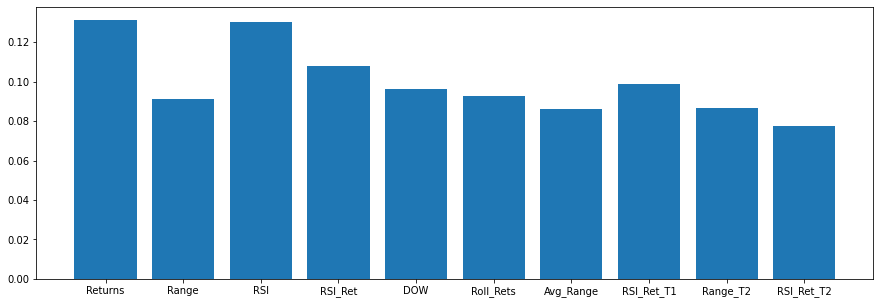

In [32]:
# Plot Recommended Features
fig = plt.figure(figsize=(15, 5))
plt.bar(recommended_feature_labels, recommended_feature_score)
plt.show()

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from xgboost import plot_tree

In [34]:
df = pd.read_csv("BTC-USD.csv")
df.set_index("Date", inplace=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'Range',
       'Bench_C_Rets', 'RSI', 'RSI_Ret', 'MA_12', 'MA_21', 'DOW', 'Roll_Rets',
       'Avg_Range', 'Returns_T1', 'Range_T1', 'RSI_Ret_T1', 'Returns_T2',
       'Range_T2', 'RSI_Ret_T2'],
      dtype='object')

In [35]:
# Specify Target
df.loc[df["Range"].shift(-1) > df["Avg_Range"], "TARGET"] = 1
df.loc[df["Range"].shift(-1) <= df["Avg_Range"], "TARGET"] = 0

In [36]:
# Fill NA
df["TARGET"].fillna(0, inplace=True)
df.tail()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2,TARGET
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-28,-0.021487,-0.018129,0.008047,28814.900391,-0.029042,0.006544,0.009117,32.894788,37.238957,1.027560,...,5,-0.298233,0.056286,-0.021856,0.036020,0.949541,-0.009984,0.055632,0.977232,0.0
2022-05-29,0.013879,0.023707,0.010035,29445.957031,-0.490594,0.021900,0.022777,33.634047,40.613855,1.090628,...,6,-0.247068,0.055605,0.006544,0.009117,1.027560,-0.021856,0.036020,0.949541,1.0
2022-05-30,0.014593,0.083111,0.016035,31726.390625,1.170788,0.077445,0.090298,36.313300,50.890862,1.253042,...,0,-0.146443,0.057666,0.021900,0.022777,1.090628,0.006544,0.009117,1.027560,0.0
2022-05-31,0.077454,0.009397,0.067657,31792.310547,-0.146132,0.002078,0.030803,36.391116,51.154006,1.005171,...,1,-0.164364,0.057768,0.077445,0.090298,1.253042,0.021900,0.022777,1.090628,1.0
2022-06-01,0.002165,-0.009072,-0.057040,29799.080078,0.226536,-0.062695,0.083239,34.041939,43.554422,0.851437,...,2,-0.228625,0.059741,0.002078,0.030803,1.005171,0.077445,0.090298,1.253042,0.0


TRAIN TEST SPLIT

In [38]:
# Feature Selection
df_tts = df.copy()
df_tts = df_tts[["Returns", "Range", "RSI", "RSI_Ret", "Returns_T1", "RSI_Ret_T1", "TARGET"]]
# Split into X and Y Data
X = df_tts.iloc[:, : -1]
y = df_tts.iloc[:, -1]
# Perform Train Test Split (Timeseries based method)
train_size_rate = 0.7
train_size = int(len(X) * train_size_rate)
test_size = len(X) - train_size
X_train = X.head(train_size)
y_train = y.head(train_size)
X_test = X.tail(test_size)
y_test = y.tail(test_size)
size_check = len(y_test) + len(y_train) == len(X)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
print("Size Matches: ", size_check)

Shape of X_train:  (1363, 6)
Shape of y_train:  (1363,)
Shape of X_test:  (585, 6)
Shape of y_test:  (585,)
Size Matches:  True


BUILD MODEL

In [39]:
# Select type of model to optimize for
is_binary = True
is_optimise_for_precision = True

In [40]:
# Determine Objective and Eval Metrics
if is_binary:
    objective = "binary:logistic"
    eval_metric = "logloss"
    eval_metric_list = ["error", "logloss", eval_metric]
else:
    objective = "multi:softmax"
    eval_metric = "mlogloss"
    eval_metric_list = ["merror", "mlogloss", eval_metric]

In [41]:
# Refine Eval Metric
if is_binary and is_optimise_for_precision:
    eval_metric = "aucpr"
    scoring = "precision"
elif is_binary and not is_optimise_for_precision:
    eval_metric = "auc"
    scoring = "f1"
else:
    scoring = "accuracy"

In [42]:
# Hyperparams: ne: 80, lr: 0.01 md: 3 gm: 6
ne = 150
lr = 0.01
md = 2
gm = 6

XGBOOST Classifier

In [43]:
classifier = XGBClassifier(
    objective=objective,
    booster="gbtree",
    eval_metric=eval_metric,
    n_estimators=ne,
    learning_rate=lr,
    max_depth=md,
    gamma=gm,
    subsample=0.8,
    colsample_bytree=1,
    random_state=1,
    use_label_encoder=False
)

In [44]:
# Fit Model
eval_set = [(X_train, y_train), (X_test, y_test)]
classifier.fit(X_train, y_train, eval_metric=eval_metric_list, eval_set=eval_set, verbose=False)

XGBClassifier(eval_metric='aucpr', gamma=6, learning_rate=0.01, max_depth=2,
              n_estimators=150, random_state=1, subsample=0.8,
              use_label_encoder=False)

Make Predictions

In [45]:
# Get Predictions Training
train_yhat = classifier.predict(X_train)
train_yhat_proba = classifier.predict_proba(X_train)
print("Preds Training Data: \n", train_yhat[:10])
print("Preds Probabilities Training Data: \n", train_yhat_proba[:3])

Preds Training Data: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Preds Probabilities Training Data: 
 [[0.67917484 0.32082516]
 [0.6628872  0.3371128 ]
 [0.625505   0.37449503]]


In [46]:
# Get Predictions Test
test_yhat = classifier.predict(X_test)
test_yhat_proba = classifier.predict_proba(X_test)
print("Preds Test Data: \n", test_yhat[:10])
print("Preds Probabilities Training Data: \n", test_yhat_proba[:3])

Preds Test Data: 
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
Preds Probabilities Training Data: 
 [[0.39635187 0.6036481 ]
 [0.39635187 0.6036481 ]
 [0.3615198  0.6384802 ]]


In [47]:
# Set K-Fold Cross Validation Levels
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

In [48]:
# Training Results
train_results = cross_val_score(classifier, X_train, y_train, scoring=scoring, cv=cv, n_jobs=1)

Evaluation Metrics - Loss and Overfitting

In [49]:
# Retrieve performance metrics
results = classifier.evals_result()
epochs = len(results["validation_0"]["error"])
x_axis = range(0, epochs)

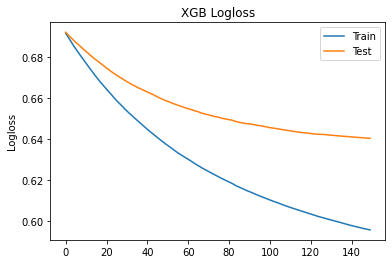

In [50]:
# Plot Log Loss
fig, ax = plt.subplots()
ax.plot(x_axis, results["validation_0"]["logloss"], label="Train")
ax.plot(x_axis, results["validation_1"]["logloss"], label="Test")
ax.legend()
plt.ylabel("Logloss")
plt.title("XGB Logloss")
plt.show()

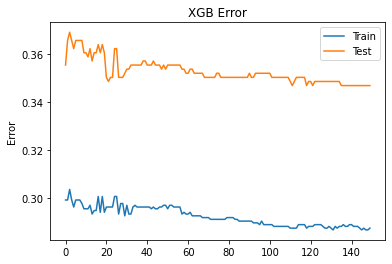

In [51]:
# Plot Classification Error
fig, ax = plt.subplots()
ax.plot(x_axis, results["validation_0"]["error"], label="Train")
ax.plot(x_axis, results["validation_1"]["error"], label="Test")
ax.legend()
plt.ylabel("Error")
plt.title("XGB Error")
plt.show()

Evaluation Metrics - ROC Curve

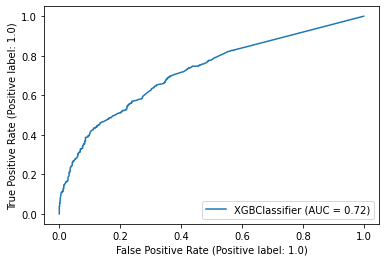

In [52]:
# Plot Training ROC Curve
plot_roc_curve(classifier, X_train, y_train)

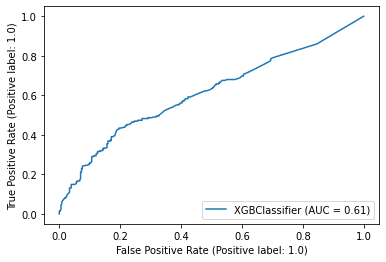

In [53]:
# Plot Test ROC Curve
plot_roc_curve(classifier, X_test, y_test)

PERFOMANCE EVALUATION

In [54]:
# Set K-Fold Cross Validation Levels
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

In [55]:
# Training and Test Results
train_results = cross_val_score(classifier, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
test_results = cross_val_score(classifier, X_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)

In [57]:
# Comparison of Results
print("TRAIN:")
print("Average Acc K-Fold", round(train_results.mean(), 2))
print("Std Dev K-Fold", round(train_results.std(), 2))
print("Precision Score 0", round(precision_score(y_train, train_yhat, average=None)[0], 3))
print("Precision Score 1", round(precision_score(y_train, train_yhat, average=None)[1], 3))
print("--------------------------------------")
print("TEST:")
print("Average Acc K-Fold", round(test_results.mean(), 2))
print("Std Dev K-Fold", round(test_results.std(), 2))
print("Precision Score 0", round(precision_score(y_test, test_yhat, average=None)[0], 3))
print("Precision Score 1", round(precision_score(y_test, test_yhat, average=None)[1], 3))
print("")

TRAIN:
Average Acc K-Fold 0.69
Std Dev K-Fold 0.03
Precision Score 0 0.711
Precision Score 1 0.718
--------------------------------------
TEST:
Average Acc K-Fold 0.62
Std Dev K-Fold 0.1
Precision Score 0 0.659
Precision Score 1 0.624



Evaluation Metrics - Report

In [59]:
print(classification_report(y_train, train_yhat))

              precision    recall  f1-score   support

         0.0       0.71      0.93      0.80       872
         1.0       0.72      0.33      0.45       491

    accuracy                           0.71      1363
   macro avg       0.71      0.63      0.63      1363
weighted avg       0.71      0.71      0.68      1363



In [60]:
print(classification_report(y_test, test_yhat))

              precision    recall  f1-score   support

         0.0       0.66      0.89      0.76       357
         1.0       0.62      0.28      0.38       228

    accuracy                           0.65       585
   macro avg       0.64      0.58      0.57       585
weighted avg       0.65      0.65      0.61       585



Performance Evaluation - Confusion Matrix

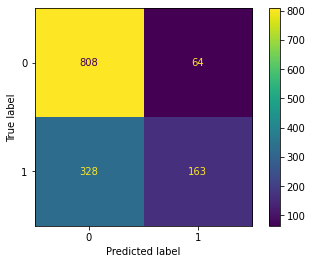

In [63]:
# Training Confusion Matrix
cm_train = confusion_matrix(y_train, train_yhat)
ConfusionMatrixDisplay(cm_train).plot()

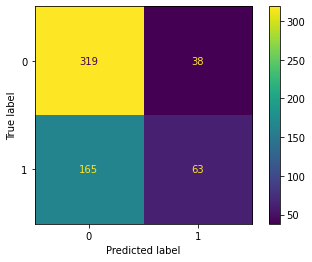

In [64]:
# Test Confusion Matrix
cm_test = confusion_matrix(y_test, test_yhat)
ConfusionMatrixDisplay(cm_test).plot()

FEATURE IMPORTANCE

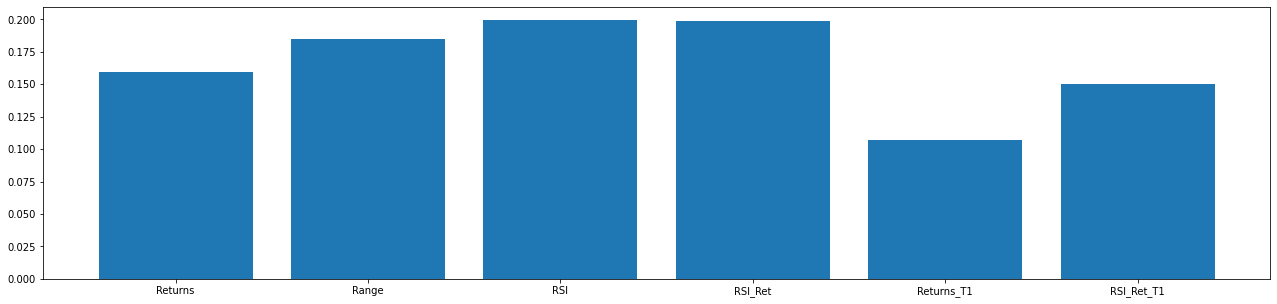

In [66]:
# Plot Feature Importances
fig = plt.figure(figsize=(22, 5))
importance_labels = X.columns
importance_features = classifier.feature_importances_
plt.bar(importance_labels, importance_features)
plt.show()

FINAL XGBOOST TREE

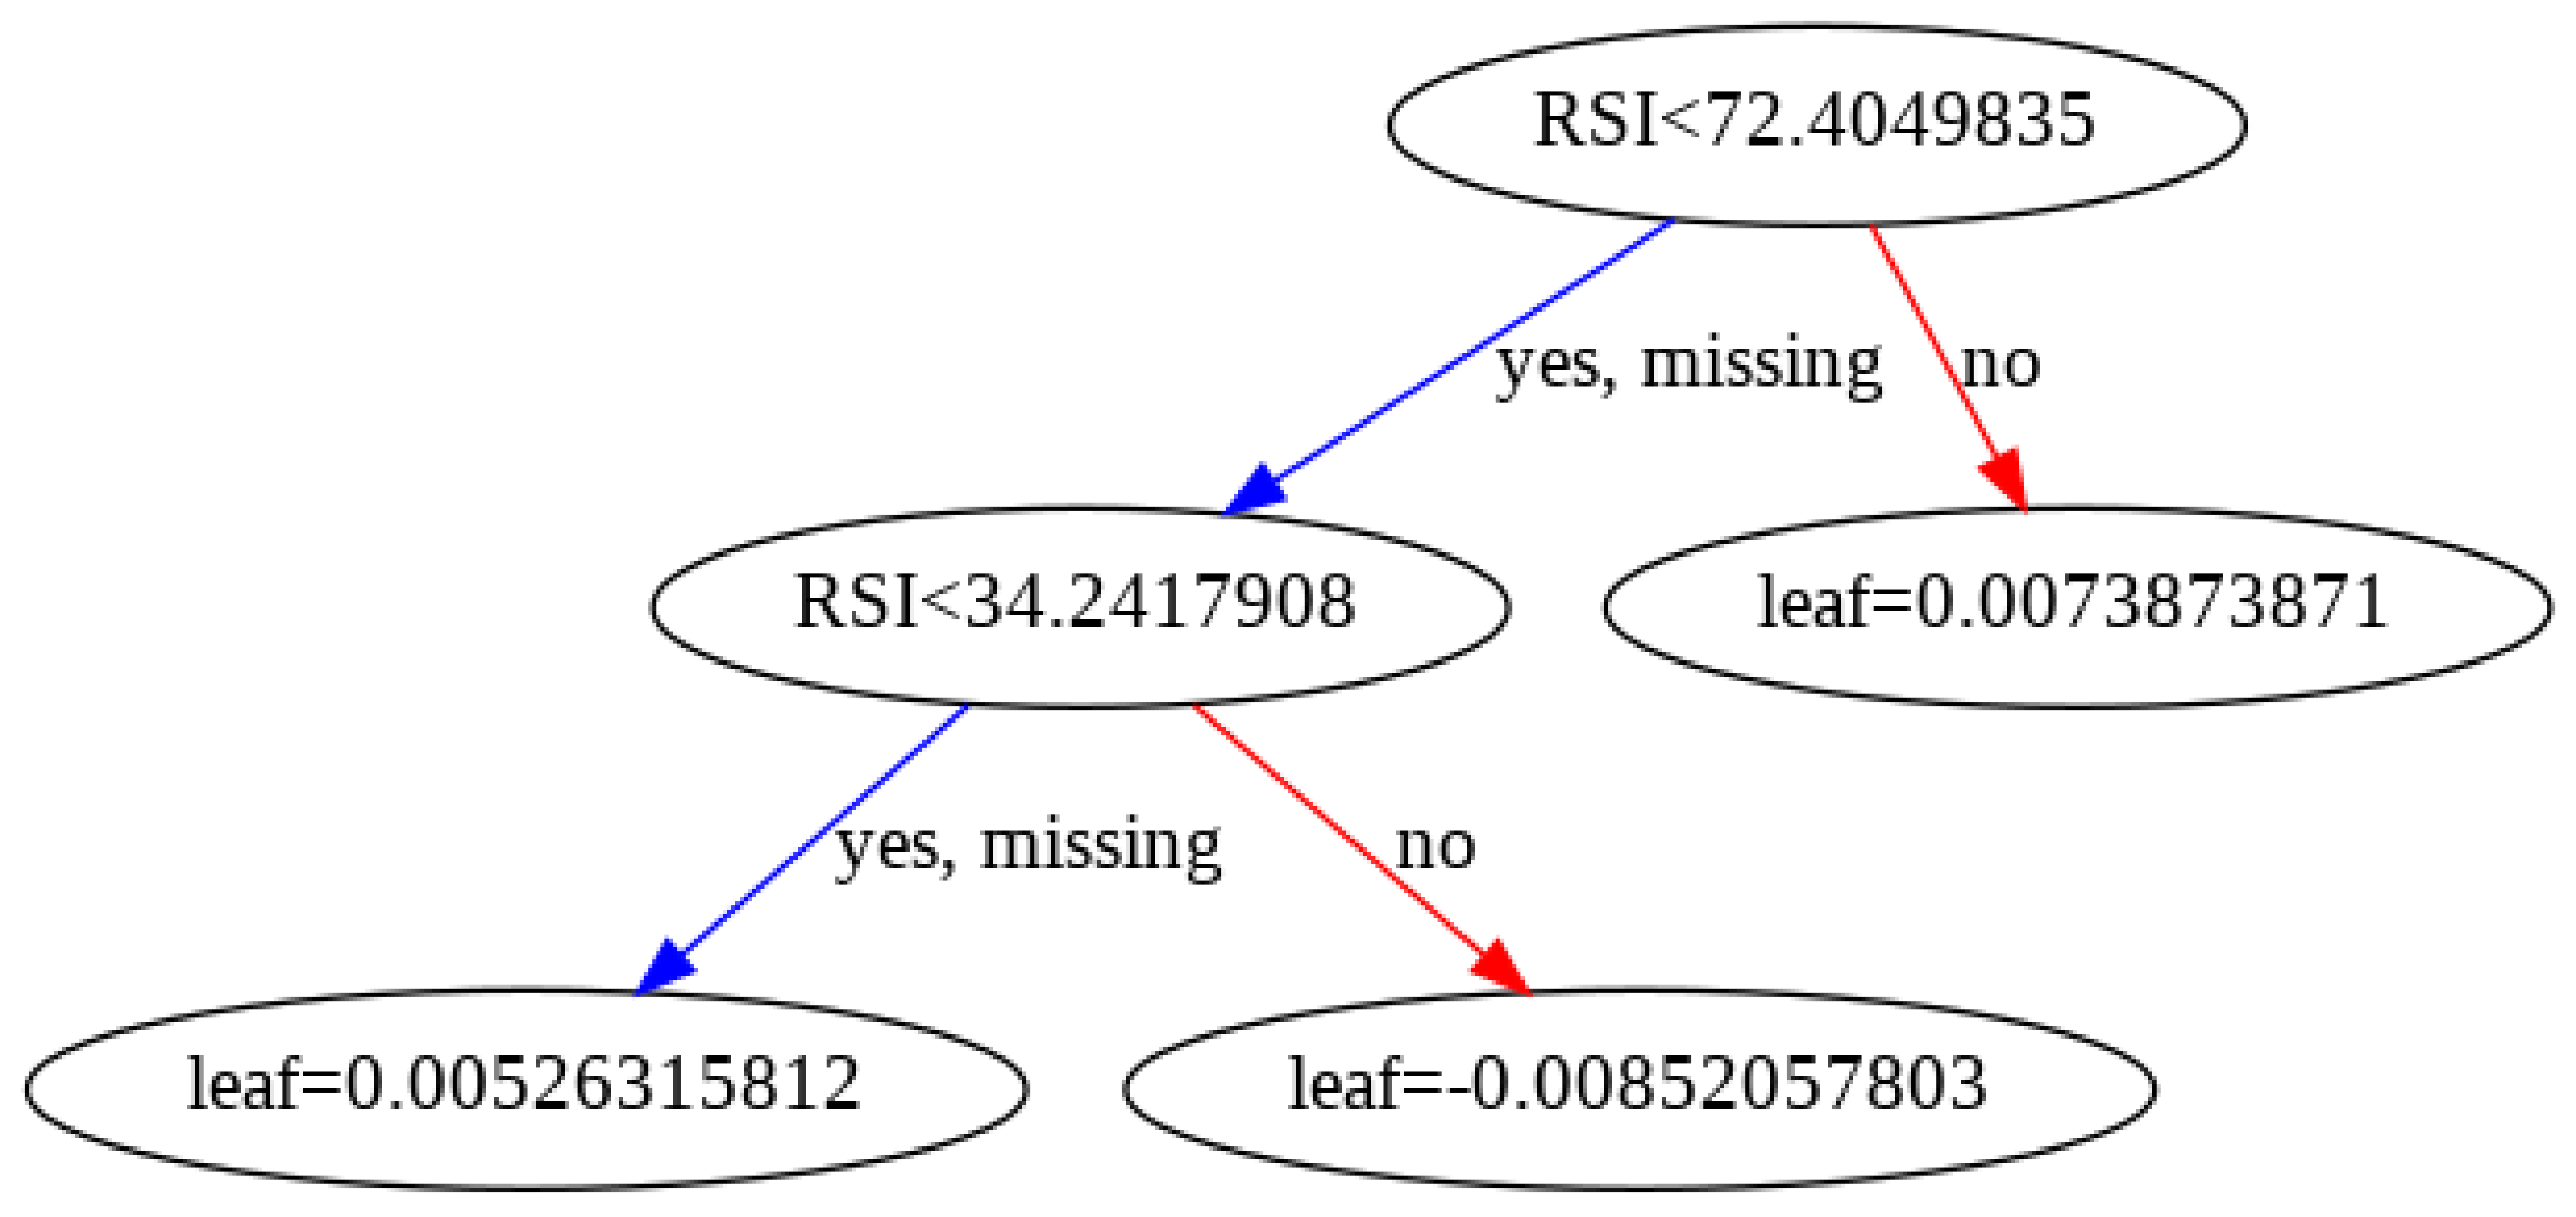

In [67]:
rcParams["figure.figsize"] = 80, 50
plot_tree(classifier)